<a href="https://colab.research.google.com/github/NathanaelMutua/British-Airways-Data-Science-Challenge/blob/master/British%20Airways%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **British Airways Data Science Challenge**

## **Description**
My solutions for the Forage program: are web scraping, data cleaning, analysis, and visualization to extract business insights.

Demonstrating practical data science skills for real-world problem-solving.

## **Task 1**
### **1. Scrape data from the web**
The first thing to do will be to scrape review data from the site [Skytrax](https://www.airlinequality.com/airline-reviews/british-airways/)

I will use Jupyter Notebook to perform data gathering, cleaning, and analysis.

### **2. Clean the Data**
Starting by cleaning our messy text dataset to prepare it for analysis.

Explore insights using techniques like topic modeling, sentiment analysis, and word clouds.

### **3. Present Insights**
Summarize my key findings in a single PowerPoint slide.

Include visualizations, metrics, and clear explanations to convey my results quickly.


# **Pre-scraping exercises**
I will use builtwith and python-whois before web scraping a website as it is important for understanding the website’s structure, technologies, and ownership details.

## **1. *builtwith*: Understanding Website Technologies**

**Purpose**: Identifies the technologies and frameworks a website uses (e.g., CMS, analytics tools, server information, JavaScript libraries).

**Why It’s Important**:

**Choose the right scraping tools**: Knowing if a site uses JavaScript-heavy frameworks (like React or Angular) helps you decide whether to use Selenium or BeautifulSoup.

**Target relevant data sources**: If APIs are detected, you can access data directly rather than scraping HTML.

**Optimize scraping strategies**: Understanding server technologies (e.g., Nginx, Apache) can help tailor request headers to avoid blocks.

## **2. *python-whois*: Checking Ownership and Legal Compliance**

**Purpose**: Retrieves domain registration information, including the owner's details, registration dates, and hosting provider.

**Why It’s Important**:

**Assess legality and ethics**: Ensures that scraping does not violate terms of service or copyright laws, especially for personal or sensitive data.

**Identify scraping policies**: Sometimes, WHOIS data can guide you to official contacts or documentation on scraping permissions.

**Avoid scraping restricted domains**: Some domains may have stricter rules or legal protections that should be respected.

In [1]:
# Let's first see what technology the website uses using the 'builtwth' library
!pip install builtwith

  Preparing metadata (setup.py) ... done
  Created wheel for builtwith: filename=builtwith-1.3.4-py3-none-any.whl size=36079 sha256=2c1152ec2eae22fdaaeb2202b17cabe9be6cc921c3e1f188602aa2da3d2005c2
  Stored in directory: /root/.cache/pip/wheels/19/85/16/8396a3cc152be563ea21d302952ff7737ff23663d11c1ec864
Successfully built builtwith


In [2]:
import builtwith

In [3]:
website = "https://www.airlinequality.com"
result = builtwith.parse(website)
print(result)

{'cdn': ['CloudFlare'], 'advertising-networks': ['Google AdSense'], 'font-scripts': ['Google Font API'], 'photo-galleries': ['Lightbox'], 'javascript-frameworks': ['Lightbox', 'Modernizr', 'jQuery'], 'cms': ['WordPress'], 'programming-languages': ['PHP'], 'blogs': ['PHP', 'WordPress'], 'marketing-automation': ['Yoast SEO'], 'web-frameworks': ['ZURB Foundation']}


In [4]:
!pip install python-whois

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.2/104.2 kB 2.0 MB/s eta 0:00:00


In [5]:
import whois

In [6]:
print(whois.whois(website))

{
  "domain_name": "AIRLINEQUALITY.COM",
  "registrar": "TUCOWS, INC.",
  "registrar_url": [
    "http://www.tucows.com",
    "http://tucowsdomains.com"
  ],
  "reseller": "Namesco Limited",
  "whois_server": "whois.tucows.com",
  "referral_url": null,
  "updated_date": "2025-02-24 09:38:12",
  "creation_date": "2000-02-24 11:52:16",
  "expiration_date": "2026-02-24 11:52:14",
  "name_servers": [
    "AMIR.NS.CLOUDFLARE.COM",
    "CRUZ.NS.CLOUDFLARE.COM"
  ],
  "status": [
    "clientTransferProhibited https://icann.org/epp#clientTransferProhibited",
    "clientUpdateProhibited https://icann.org/epp#clientUpdateProhibited"
  ],
  "emails": [
    "domainabuse@tucows.com",
    "transfers@names.co.uk"
  ],
  "dnssec": "unsigned",
  "name": "REDACTED FOR PRIVACY",
  "org": "REDACTED FOR PRIVACY",
  "address": "REDACTED FOR PRIVACY",
  "city": "REDACTED FOR PRIVACY",
  "state": "Greater London",
  "registrant_postal_code": "REDACTED FOR PRIVACY",
  "country": "GB"
}


# **a) Web Scrapping**
 We will loop through the pages on Skytrax.com and collect the necessary data.

 We may not use all the collected data, however, for future manipulation it may be vital.(e.g, date data)

In [7]:
# Required libraries for Scraping
import requests
from bs4 import BeautifulSoup

In [8]:
# Scraper

base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 40
ratings = []
names = []
dates = []
reviews = []

# let's loop through our pages
for i in range(1, pages+1):
    page_url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize=100"
    response = requests.get(page_url, timeout=10) # Make request
    response.raise_for_status()
    soup = BeautifulSoup(response.text, 'html') # Parsing

    # Getting name data from the page and adding it to the name list.
    for span in soup.find_all("span", itemprop="name"):
        names.append(span.get_text())

    # Getting date data from the page and adding it to the list of dates.
    for time in soup.find_all("time", itemprop="datePublished"):
        dates.append(time.get_text())

    # Getting review data from the page and adding it to the list of reviews.
    for div in soup.find_all("div", itemprop="reviewBody", ):
        reviews.append(div.get_text())

    print(f"<--- Reviews in page {i}: {len(reviews)}")

<--- Reviews in page 1: 100
<--- Reviews in page 2: 200
<--- Reviews in page 3: 300
<--- Reviews in page 4: 400
<--- Reviews in page 5: 500
<--- Reviews in page 6: 600
<--- Reviews in page 7: 700
<--- Reviews in page 8: 800
<--- Reviews in page 9: 900
<--- Reviews in page 10: 1000
<--- Reviews in page 11: 1100
<--- Reviews in page 12: 1200
<--- Reviews in page 13: 1300
<--- Reviews in page 14: 1400
<--- Reviews in page 15: 1500
<--- Reviews in page 16: 1600
<--- Reviews in page 17: 1700
<--- Reviews in page 18: 1800
<--- Reviews in page 19: 1900
<--- Reviews in page 20: 2000
<--- Reviews in page 21: 2100
<--- Reviews in page 22: 2200
<--- Reviews in page 23: 2300
<--- Reviews in page 24: 2400
<--- Reviews in page 25: 2500
<--- Reviews in page 26: 2600
<--- Reviews in page 27: 2700
<--- Reviews in page 28: 2800
<--- Reviews in page 29: 2900
<--- Reviews in page 30: 3000
<--- Reviews in page 31: 3100
<--- Reviews in page 32: 3200
<--- Reviews in page 33: 3300
<--- Reviews in page 34: 340

In [9]:
# Let's Update our dataframe with the values we scraped from the website pages

import pandas as pd
data = pd.DataFrame()
data["Reviews"] = reviews

In [10]:
data

,Reviews
0,✅ Trip Verified | Prior to boarding a gate a...
1,✅ Trip Verified | I flew from Amsterdam to L...
2,"✅ Trip Verified | First the good news, the clu..."
3,✅ Trip Verified | I have never travelled wit...
4,"✅ Trip Verified | Terrible overall, medium ser..."
...,...
3912,YYZ to LHR - July 2012 - I flew overnight in p...
3913,LHR to HAM. Purser addresses all club passenge...
3914,My son who had worked for British Airways urge...
3915,London City-New York JFK via Shannon on A318 b...


# **b) Data Cleaning**

This is  the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset.

When sourcing data, there are many opportunities for data to be in a format in which it is difficult to analyze or manipulate.

## **Text Cleaning**

### **Removing inconsistent data**
We remove the "✅ Trip Verified" and "Not Verified".
They do not appear in older reviews.

Additionaly, this text will bring errors in our analysis later on. Such as

In [11]:
# Let's split the reviews, removing the verification because older reviews lack this data

# creating a boolean mask for rows with "Verified" text
mask_verification = data["Reviews"].str.contains("Verified", na=False)

# We now remove the text that appears before the "|" in the rows with "Verified"
data.loc[mask_verification, "Reviews"] = (data.loc[mask_verification, "Reviews"].str.replace(r"^.*?\|", "", regex=True).str.strip())

In [12]:
data

,Reviews
0,Prior to boarding a gate agent seemed to pick ...
1,I flew from Amsterdam to Las Vegas with a layo...
2,"First the good news, the club suites are such ..."
3,I have never travelled with British airways be...
4,"Terrible overall, medium service and the fligh..."
...,...
3912,YYZ to LHR - July 2012 - I flew overnight in p...
3913,LHR to HAM. Purser addresses all club passenge...
3914,My son who had worked for British Airways urge...
3915,London City-New York JFK via Shannon on A318 b...


## **Converting Text To Lowercase**

Converting text to lowercase is a common preprocessing step in data cleaning and natural language processing.  

It transforms all text characters to their lowercase equivalents, ensuring uniformity and consistency within the dataset.

This is crucial because it treats words with the same spelling but different capitalization as identical, preventing them from being interpreted as distinct entities by algorithms and analytical tools.  

This standardization simplifies tasks like text comparison, search, and analysis, leading to more accurate and efficient results.  

For example, "Flight", "flight", and "FLIGHT" would all be treated as "flight" after lowercasing.

In [13]:
data[["Cleaned_Reviews"]] = data[["Reviews"]].apply(lambda x: x.str.lower())

In [14]:
data

,Reviews,Cleaned_Reviews
0,Prior to boarding a gate agent seemed to pick ...,prior to boarding a gate agent seemed to pick ...
1,I flew from Amsterdam to Las Vegas with a layo...,i flew from amsterdam to las vegas with a layo...
2,"First the good news, the club suites are such ...","first the good news, the club suites are such ..."
3,I have never travelled with British airways be...,i have never travelled with british airways be...
4,"Terrible overall, medium service and the fligh...","terrible overall, medium service and the fligh..."
...,...,...
3912,YYZ to LHR - July 2012 - I flew overnight in p...,yyz to lhr - july 2012 - i flew overnight in p...
3913,LHR to HAM. Purser addresses all club passenge...,lhr to ham. purser addresses all club passenge...
3914,My son who had worked for British Airways urge...,my son who had worked for british airways urge...
3915,London City-New York JFK via Shannon on A318 b...,london city-new york jfk via shannon on a318 b...


## **Removing All Special Characters/Punctuations**

Removing special characters and punctuation from data is a preprocessing step that cleans and standardizes text.  These characters, while sometimes meaningful, can often hinder analysis and confuse algorithms, particularly in natural language processing and machine learning.

Removing them creates a more uniform dataset, improving consistency, simplifying analysis, and optimizing the data for tasks like text mining, sentiment analysis, and model training.  

This ensures more accurate and reliable results by focusing on the core textual content.


In [15]:
data["Cleaned_Reviews"] = data["Cleaned_Reviews"].str.replace(r'[^\w\s]', "", regex=True)
data

,Reviews,Cleaned_Reviews
0,Prior to boarding a gate agent seemed to pick ...,prior to boarding a gate agent seemed to pick ...
1,I flew from Amsterdam to Las Vegas with a layo...,i flew from amsterdam to las vegas with a layo...
2,"First the good news, the club suites are such ...",first the good news the club suites are such a...
3,I have never travelled with British airways be...,i have never travelled with british airways be...
4,"Terrible overall, medium service and the fligh...",terrible overall medium service and the flight...
...,...,...
3912,YYZ to LHR - July 2012 - I flew overnight in p...,yyz to lhr july 2012 i flew overnight in pre...
3913,LHR to HAM. Purser addresses all club passenge...,lhr to ham purser addresses all club passenger...
3914,My son who had worked for British Airways urge...,my son who had worked for british airways urge...
3915,London City-New York JFK via Shannon on A318 b...,london citynew york jfk via shannon on a318 bu...


## **Word Tokenization**
Word tokenization is the process of splitting a text string into individual words.

It’s a fundamental step in natural language processing (NLP) that allows further analysis such as sentiment analysis, text classification, and keyword extraction.

### *Why Word Tokenization Matters:*
◽ Prepares data for analysis: Converts raw text into manageable word units.

◽ Removes ambiguity: Handles punctuation and special characters.

◽ Facilitates feature extraction: Enables frequency counts, embeddings, and more.

In [16]:
!pip install spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 61.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [17]:
# Spacy is ideal for complex NLP tasks where detailed token info is required
import spacy
nlp = spacy.load("en_core_web_sm")

data["Cleaned_Reviews"] = data["Cleaned_Reviews"].apply(lambda x: [token.text for token in nlp(x)])
data

,Reviews,Cleaned_Reviews
0,Prior to boarding a gate agent seemed to pick ...,"[prior, to, boarding, a, gate, agent, seemed, ..."
1,I flew from Amsterdam to Las Vegas with a layo...,"[i, flew, from, amsterdam, to, las, vegas, wit..."
2,"First the good news, the club suites are such ...","[first, the, good, news, the, club, suites, ar..."
3,I have never travelled with British airways be...,"[i, have, never, travelled, with, british, air..."
4,"Terrible overall, medium service and the fligh...","[terrible, overall, medium, service, and, the,..."
...,...,...
3912,YYZ to LHR - July 2012 - I flew overnight in p...,"[yyz, to, lhr, , july, 2012, , i, flew, over..."
3913,LHR to HAM. Purser addresses all club passenge...,"[lhr, to, ham, purser, addresses, all, club, p..."
3914,My son who had worked for British Airways urge...,"[my, son, who, had, worked, for, british, airw..."
3915,London City-New York JFK via Shannon on A318 b...,"[london, citynew, york, jfk, via, shannon, on,..."


In [18]:
print(data["Cleaned_Reviews"][3912])

['yyz', 'to', 'lhr', ' ', 'july', '2012', ' ', 'i', 'flew', 'overnight', 'in', 'premium', 'economy', 'on', 'a', '767', 'i', 'chose', 'this', 'flight', 'because', 'on', 'the', '767', 'the', 'layout', 'is', '222', 'i', 'chose', 'an', 'aisle', 'seat', 'in', 'the', 'middle', '2', 'so', 'i', 'could', 'go', 'to', 'the', 'washroom', 'etc', 'without', 'disturbing', 'y', 'seat', 'ate', 'and', 'vice', 'versa', 'the', 'seats', 'are', 'comparable', 'to', 'north', 'american', 'business', 'class', 'except', 'with', 'narrower', 'arm', 'rests', 'better', 'than', 'economy', 'but', 'still', 'not', 'meant', 'for', 'sharing', 'the', 'entree', 'food', 'was', 'the', 'same', 'as', 'business', 'class', 'and', 'i', 'was', 'nt', 'really', 'impressed', 'it', 'was', 'nt', 'bad', 'but', 'was', 'nt', 'good', 'either', 'i', 'would', 'definitely', 'fly', 'ba', 'on', 'this', 'route', 'again', 'mostly', 'because', 'of', 'the', 'layout', 'and', 'the', 'option', 'to', 'fly', 'premium', 'economy']


## **Part-of-Speech (POS) Tagging**

This is the process of assigning grammatical categories (such as nouns, verbs, adjectives, and adverbs) to each word in a text.

It helps in understanding the structure and meaning of sentences by identifying how words function in context, enabling deeper language analysis for tasks like sentiment analysis, text summarization, and information extraction.

### *What the POS Tags Mean (Common spaCy POS Tags):*
NOUN: Noun (person, place, thing)

VERB: Verb (action, process)

ADJ: Adjective (describes nouns)

ADV: Adverb (modifies verbs/adjectives)

DET: Determiner (e.g., the, a)

AUX: Auxiliary (helping verb, e.g., is, was)

ADP: Adposition (prepositions like for, in)

PUNCT: Punctuation

PRON: Pronoun (e.g., he, she)

In [19]:
from spacy.tokens import Doc

# Apply POS tagging where the new row will have ('tokenized word', 'respective POS tag')
data["POS_Tagged_Reviews"] = data["Cleaned_Reviews"].apply(lambda x :[(token.text, token.pos_) for token in nlp(" ".join(x))])
data

,Reviews,Cleaned_Reviews,POS_Tagged_Reviews
0,Prior to boarding a gate agent seemed to pick ...,"[prior, to, boarding, a, gate, agent, seemed, ...","[(prior, ADV), (to, ADP), (boarding, VERB), (a..."
1,I flew from Amsterdam to Las Vegas with a layo...,"[i, flew, from, amsterdam, to, las, vegas, wit...","[(i, PRON), (flew, VERB), (from, ADP), (amster..."
2,"First the good news, the club suites are such ...","[first, the, good, news, the, club, suites, ar...","[(first, ADV), (the, DET), (good, ADJ), (news,..."
3,I have never travelled with British airways be...,"[i, have, never, travelled, with, british, air...","[(i, PRON), (have, AUX), (never, ADV), (travel..."
4,"Terrible overall, medium service and the fligh...","[terrible, overall, medium, service, and, the,...","[(terrible, ADJ), (overall, ADJ), (medium, ADJ..."
...,...,...,...
3912,YYZ to LHR - July 2012 - I flew overnight in p...,"[yyz, to, lhr, , july, 2012, , i, flew, over...","[(yyz, INTJ), (to, ADP), (lhr, PROPN), ( , SP..."
3913,LHR to HAM. Purser addresses all club passenge...,"[lhr, to, ham, purser, addresses, all, club, p...","[(lhr, PROPN), (to, ADP), (ham, NOUN), (purser..."
3914,My son who had worked for British Airways urge...,"[my, son, who, had, worked, for, british, airw...","[(my, PRON), (son, NOUN), (who, PRON), (had, A..."
3915,London City-New York JFK via Shannon on A318 b...,"[london, citynew, york, jfk, via, shannon, on,...","[(london, PROPN), (citynew, PROPN), (york, PRO..."


 ## **Stopword Removal**

 This is the process of eliminating common words (such as "and," "the," "is," and "in") from text data.

 These words typically carry little meaningful information and are removed to reduce noise, improve processing efficiency, and enhance the performance of natural language processing (NLP) tasks like text classification, sentiment analysis, and keyword extraction.

In [20]:
# Removing stopwords and assigning the cleaned data to a new column
data["Reviews_No_Stopwords"] = data["Cleaned_Reviews"].apply(lambda x: " ".join([token.text for token in nlp(" ".join(x) if isinstance(x, list) else x) if not token.is_stop]))
data

,Reviews,Cleaned_Reviews,POS_Tagged_Reviews,Reviews_No_Stopwords
0,Prior to boarding a gate agent seemed to pick ...,"[prior, to, boarding, a, gate, agent, seemed, ...","[(prior, ADV), (to, ADP), (boarding, VERB), (a...",prior boarding gate agent pick elderly people ...
1,I flew from Amsterdam to Las Vegas with a layo...,"[i, flew, from, amsterdam, to, las, vegas, wit...","[(i, PRON), (flew, VERB), (from, ADP), (amster...",flew amsterdam las vegas layover heathrow nove...
2,"First the good news, the club suites are such ...","[first, the, good, news, the, club, suites, ar...","[(first, ADV), (the, DET), (good, ADJ), (news,...",good news club suites huge improvement old bus...
3,I have never travelled with British airways be...,"[i, have, never, travelled, with, british, air...","[(i, PRON), (have, AUX), (never, ADV), (travel...",travelled british airways time chose travel ba...
4,"Terrible overall, medium service and the fligh...","[terrible, overall, medium, service, and, the,...","[(terrible, ADJ), (overall, ADJ), (medium, ADJ...",terrible overall medium service flight delayed...
...,...,...,...,...
3912,YYZ to LHR - July 2012 - I flew overnight in p...,"[yyz, to, lhr, , july, 2012, , i, flew, over...","[(yyz, INTJ), (to, ADP), (lhr, PROPN), ( , SP...",yyz lhr july 2012 flew overnight premium...
3913,LHR to HAM. Purser addresses all club passenge...,"[lhr, to, ham, purser, addresses, all, club, p...","[(lhr, PROPN), (to, ADP), (ham, NOUN), (purser...",lhr ham purser addresses club passengers board...
3914,My son who had worked for British Airways urge...,"[my, son, who, had, worked, for, british, airw...","[(my, PRON), (son, NOUN), (who, PRON), (had, A...",son worked british airways urged fly british a...
3915,London City-New York JFK via Shannon on A318 b...,"[london, citynew, york, jfk, via, shannon, on,...","[(london, PROPN), (citynew, PROPN), (york, PRO...",london citynew york jfk shannon a318 nice seat...


## **Lemmatization**

This is the process of converting words to their base or dictionary form, known as the **lemma**. Unlike stemming, lemmatization considers the context and part of speech of a word, ensuring that the transformed word is meaningful. For example, the words *"running"*, *"ran"*, and *"runs"* are all reduced to the lemma *"run"*.

This process is essential in natural language processing (NLP) tasks like text analysis, sentiment analysis, and search optimization, as it helps standardize words for better understanding and comparison.

**Explanation**

For this project we will carry out lemmatization on the Reviews_No_Stopwords

Here's a breakdown of what the difference would be between the two:

For most practical NLP tasks (like sentiment analysis, word clouds, or topic modeling):

Lemmatize Reviews_No_Stopwords (Recommended).

For tasks needing precise grammatical understanding (like syntactic parsing or deep linguistic analysis):

Lemmatize POS_Tagged_Reviews with POS context.


In [21]:
# lemmatization of Reviews_No_Stopwords
data["Lemmatized_Reviews"] = data["Reviews_No_Stopwords"].apply(lambda x: " ".join([token.lemma_ for token in nlp(x)]))
data

,Reviews,Cleaned_Reviews,POS_Tagged_Reviews,Reviews_No_Stopwords,Lemmatized_Reviews
0,Prior to boarding a gate agent seemed to pick ...,"[prior, to, boarding, a, gate, agent, seemed, ...","[(prior, ADV), (to, ADP), (boarding, VERB), (a...",prior boarding gate agent pick elderly people ...,prior boarding gate agent pick elderly people ...
1,I flew from Amsterdam to Las Vegas with a layo...,"[i, flew, from, amsterdam, to, las, vegas, wit...","[(i, PRON), (flew, VERB), (from, ADP), (amster...",flew amsterdam las vegas layover heathrow nove...,fly amsterdam las vegas layover heathrow novem...
2,"First the good news, the club suites are such ...","[first, the, good, news, the, club, suites, ar...","[(first, ADV), (the, DET), (good, ADJ), (news,...",good news club suites huge improvement old bus...,good news club suit huge improvement old busin...
3,I have never travelled with British airways be...,"[i, have, never, travelled, with, british, air...","[(i, PRON), (have, AUX), (never, ADV), (travel...",travelled british airways time chose travel ba...,travel british airways time choose travel ba c...
4,"Terrible overall, medium service and the fligh...","[terrible, overall, medium, service, and, the,...","[(terrible, ADJ), (overall, ADJ), (medium, ADJ...",terrible overall medium service flight delayed...,terrible overall medium service flight delay h...
...,...,...,...,...,...
3912,YYZ to LHR - July 2012 - I flew overnight in p...,"[yyz, to, lhr, , july, 2012, , i, flew, over...","[(yyz, INTJ), (to, ADP), (lhr, PROPN), ( , SP...",yyz lhr july 2012 flew overnight premium...,yyz lhr july 2012 fly overnight premiu...
3913,LHR to HAM. Purser addresses all club passenge...,"[lhr, to, ham, purser, addresses, all, club, p...","[(lhr, PROPN), (to, ADP), (ham, NOUN), (purser...",lhr ham purser addresses club passengers board...,lhr ham purser address club passenger boarding...
3914,My son who had worked for British Airways urge...,"[my, son, who, had, worked, for, british, airw...","[(my, PRON), (son, NOUN), (who, PRON), (had, A...",son worked british airways urged fly british a...,son work british airways urge fly british airw...
3915,London City-New York JFK via Shannon on A318 b...,"[london, citynew, york, jfk, via, shannon, on,...","[(london, PROPN), (citynew, PROPN), (york, PRO...",london citynew york jfk shannon a318 nice seat...,london citynew york jfk shannon a318 nice seat...


## **Sentiment Analysis Using TextBlob**

Sentiment analysis with TextBlob involves analyzing text to determine its polarity (how positive or negative it is) and subjectivity (whether it’s opinion-based or factual).

◽ Polarity: Ranges from -1 (negative) to +1 (positive).

◽ Subjectivity: Ranges from 0 (factual/objective) to 1 (opinion/subjective).

◽ Translation: Negative is a polarity score below 0, Positive is a polarity score above 0 while, Neutral is polarity score equal to 0.

In [22]:
from textblob import TextBlob

# Application of sentiment analysis
data["Polarity"] = data["Lemmatized_Reviews"].apply(lambda x: TextBlob(x).sentiment.polarity)
data["Subjectivity"] = data["Lemmatized_Reviews"].apply(lambda x: TextBlob(x).sentiment.subjectivity)
data.head()

,Reviews,Cleaned_Reviews,POS_Tagged_Reviews,Reviews_No_Stopwords,Lemmatized_Reviews,Polarity,Subjectivity
0,Prior to boarding a gate agent seemed to pick ...,"[prior, to, boarding, a, gate, agent, seemed, ...","[(prior, ADV), (to, ADP), (boarding, VERB), (a...",prior boarding gate agent pick elderly people ...,prior boarding gate agent pick elderly people ...,-0.121978,0.425275
1,I flew from Amsterdam to Las Vegas with a layo...,"[i, flew, from, amsterdam, to, las, vegas, wit...","[(i, PRON), (flew, VERB), (from, ADP), (amster...",flew amsterdam las vegas layover heathrow nove...,fly amsterdam las vegas layover heathrow novem...,0.069974,0.589070
2,"First the good news, the club suites are such ...","[first, the, good, news, the, club, suites, ar...","[(first, ADV), (the, DET), (good, ADJ), (news,...",good news club suites huge improvement old bus...,good news club suit huge improvement old busin...,0.142424,0.705051
3,I have never travelled with British airways be...,"[i, have, never, travelled, with, british, air...","[(i, PRON), (have, AUX), (never, ADV), (travel...",travelled british airways time chose travel ba...,travel british airways time choose travel ba c...,0.430000,0.556667
4,"Terrible overall, medium service and the fligh...","[terrible, overall, medium, service, and, the,...","[(terrible, ADJ), (overall, ADJ), (medium, ADJ...",terrible overall medium service flight delayed...,terrible overall medium service flight delay h...,-0.666667,0.666667


In [23]:
# Sentiment classification (negative/positive)
data["Sentiment"] = data["Lemmatized_Reviews"].apply(lambda x: "Positive" if TextBlob(x).sentiment.polarity > 0
                                                     else ("Negative" if TextBlob(x).sentiment.polarity < 0
                                                     else "Neutral"))
# Let's see our results
data.head()

,Reviews,Cleaned_Reviews,POS_Tagged_Reviews,Reviews_No_Stopwords,Lemmatized_Reviews,Polarity,Subjectivity,Sentiment
0,Prior to boarding a gate agent seemed to pick ...,"[prior, to, boarding, a, gate, agent, seemed, ...","[(prior, ADV), (to, ADP), (boarding, VERB), (a...",prior boarding gate agent pick elderly people ...,prior boarding gate agent pick elderly people ...,-0.121978,0.425275,Negative
1,I flew from Amsterdam to Las Vegas with a layo...,"[i, flew, from, amsterdam, to, las, vegas, wit...","[(i, PRON), (flew, VERB), (from, ADP), (amster...",flew amsterdam las vegas layover heathrow nove...,fly amsterdam las vegas layover heathrow novem...,0.069974,0.589070,Positive
2,"First the good news, the club suites are such ...","[first, the, good, news, the, club, suites, ar...","[(first, ADV), (the, DET), (good, ADJ), (news,...",good news club suites huge improvement old bus...,good news club suit huge improvement old busin...,0.142424,0.705051,Positive
3,I have never travelled with British airways be...,"[i, have, never, travelled, with, british, air...","[(i, PRON), (have, AUX), (never, ADV), (travel...",travelled british airways time chose travel ba...,travel british airways time choose travel ba c...,0.430000,0.556667,Positive
4,"Terrible overall, medium service and the fligh...","[terrible, overall, medium, service, and, the,...","[(terrible, ADJ), (overall, ADJ), (medium, ADJ...",terrible overall medium service flight delayed...,terrible overall medium service flight delay h...,-0.666667,0.666667,Negative


# **c) Insight Visualization**

This is a concise, slided summary of your data analysis findings. It should include clear visualizations, key metrics, and brief explanations that highlight the main trends and insights—such as sentiment, topics, and word usage—from your text data.

Insight Visualization involves transforming your data analysis results into clear, engaging visual representations—such as charts, graphs, and diagrams—that highlight key trends, metrics, and patterns.

This approach enables stakeholders to quickly grasp complex information and make informed decisions.

## **Sentiment Distribution Bar Plot**

A sentiment distribution bar plot displays the count or percentage of data entries for each sentiment category—such as positive, negative, and neutral.

Each bar's height represents the frequency of a specific sentiment, providing a clear visual overview of the overall sentiment makeup within your dataset.

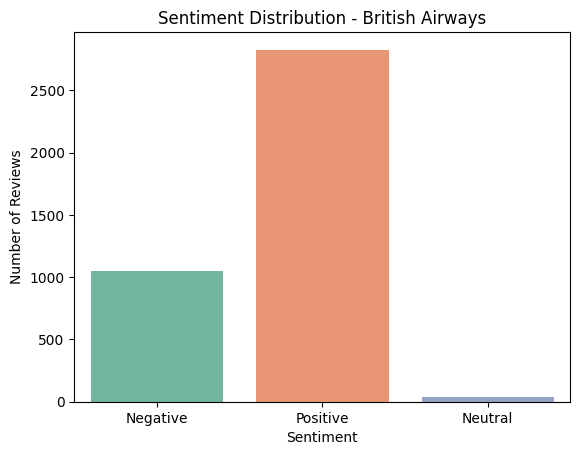

In [24]:
# Let's import required libraries
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="Sentiment", hue="Sentiment", data=data, palette="Set2")
plt.title("Sentiment Distribution - British Airways")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.show()

## **Sentiment Word Cloud**
A sentiment word cloud is a visual tool that displays words from text data, with the size of each word reflecting how often it appears.

Additionally, these words are often color-coded based on their emotional tone—positive, negative, or neutral—making it easy to quickly see the prevailing feelings in the dataset.

In [25]:
!pip install wordcloud

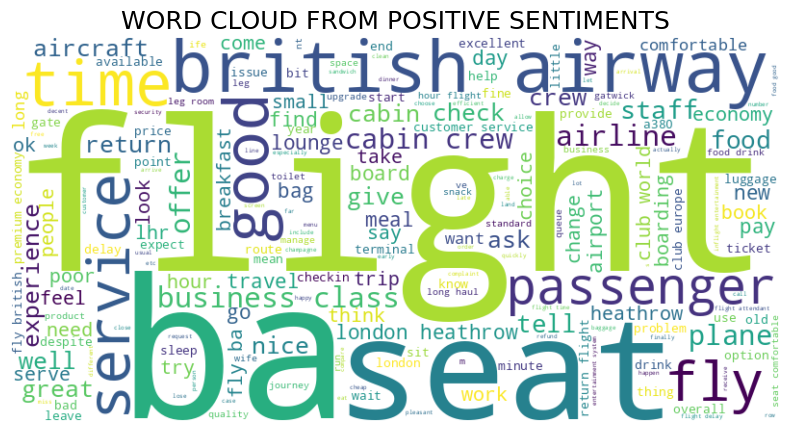

In [26]:
from wordcloud import WordCloud

# We first filter positive sentiment reviews and join into a single string
positive_text = " ".join(data[data["Sentiment"] == "Positive"]["Lemmatized_Reviews"])

# Then we can get the word cloud
positiveWordcloud = WordCloud(width=800, height=400, background_color="white", colormap="viridis").generate(positive_text)

# Then display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(positiveWordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("WORD CLOUD FROM POSITIVE SENTIMENTS", fontsize=18)
plt.show()

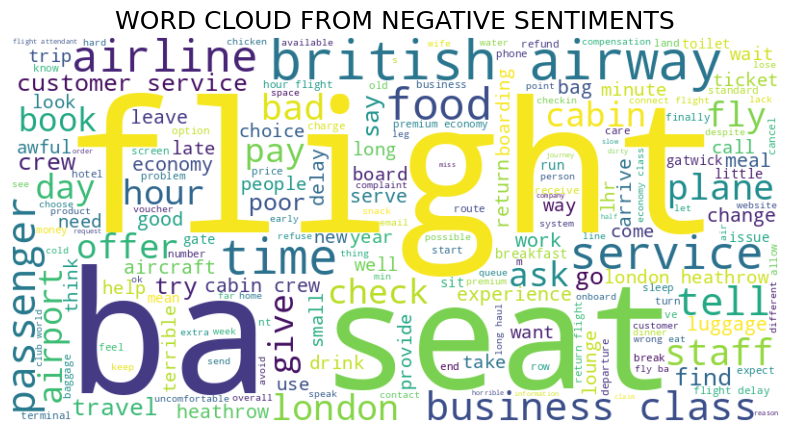

In [27]:
# We first filter negative sentiment reviews and join into a single string
negative_text = " ".join(data[data["Sentiment"] == "Negative"]["Lemmatized_Reviews"])

# Then we can get the word cloud
negativeWordcloud = WordCloud(width=800, height=400, background_color="white", colormap="viridis").generate(negative_text)

# Then display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(negativeWordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("WORD CLOUD FROM NEGATIVE SENTIMENTS", fontsize=18)
plt.show()

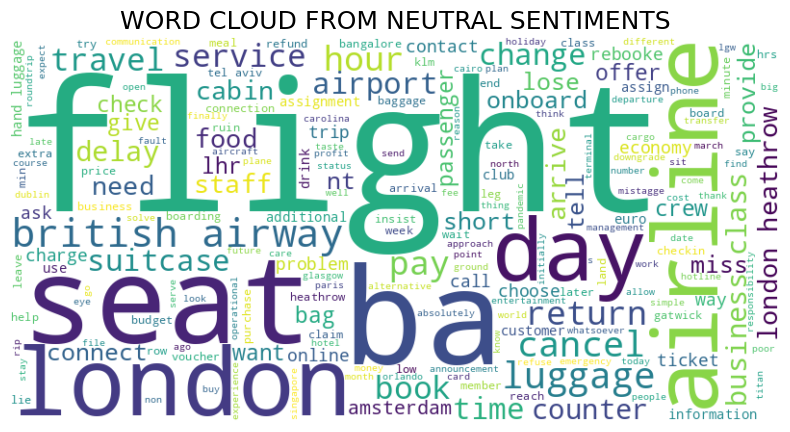

In [28]:
# We first filter neitral sentiment reviews and join into a single string
neutral_text = " ".join(data[data["Sentiment"] == "Neutral"]["Lemmatized_Reviews"])

# Then we can get the word cloud
neutralWordcloud = WordCloud(width=800, height=400, background_color="white", colormap="viridis").generate(neutral_text)

# Then display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(neutralWordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("WORD CLOUD FROM NEUTRAL SENTIMENTS", fontsize=18)
plt.show()

## **Sentiment Over Time**
Is a time series analysis that tracks the changes in emotional tone or sentiment of a dataset across different time intervals.

By plotting sentiment scores on a time series graph, you can identify trends, peaks, and shifts in public opinion, helping to understand how events or interventions impact overall sentiment.

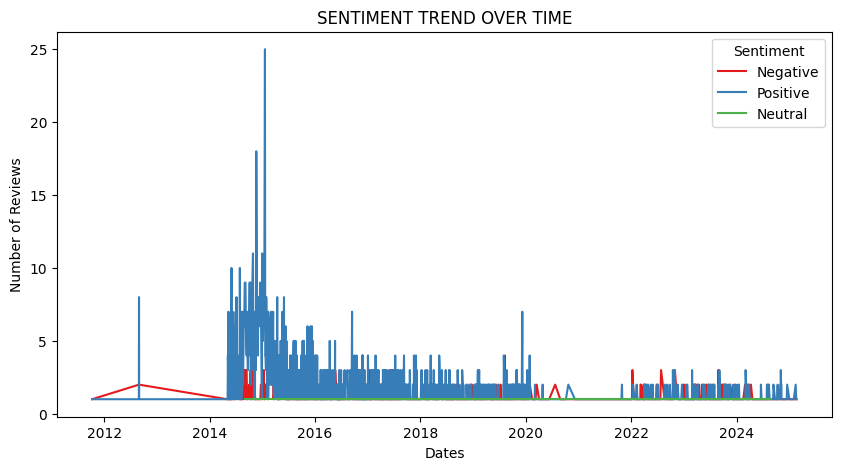

In [29]:
import re

# First let's allocate date values to a column in the dataframe
data["Dates"] = dates

# Then we convert 'dates' to datetime format
# We remove the suffixes (st, nd, rd, th) from date strings
data["Dates"] = data["Dates"].apply(lambda x: re.sub(r'(\d{1,2})(st|nd|rd|th)', r'\1', x))
data["Dates"] = pd.to_datetime(data["Dates"], format="%d %B %Y", errors='coerce')
sentiment_trend = data.groupby(["Dates", "Sentiment"]).size().reset_index(name="Count")

plt.figure(figsize=(10, 5))
sns.lineplot(x="Dates", y="Count", hue="Sentiment", data=sentiment_trend, palette="Set1")
plt.title("SENTIMENT TREND OVER TIME")
plt.xlabel("Dates")
plt.ylabel("Number of Reviews")
plt.show()


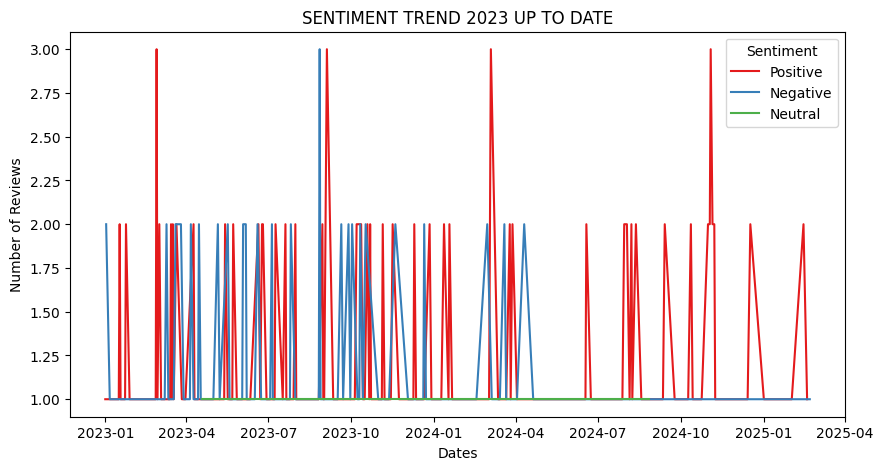

In [30]:
# Let's get a clearer view of our most recent reviews.
# Let's scope it down to the past 2 years. That is from 2023 to date.
date_filtered = data[(data["Dates"] >= "2023-01-01")]
sentiment_trend = date_filtered.groupby(["Dates", "Sentiment"]).size().reset_index(name="Count")

plt.figure(figsize=(10, 5))
sns.lineplot(x="Dates", y="Count", hue="Sentiment", data=sentiment_trend, palette="Set1")
plt.title("SENTIMENT TREND 2023 UP TO DATE")
plt.xlabel("Dates")
plt.ylabel("Number of Reviews")
plt.show()


<ipython-input-31-baa774c437b9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_filtered["Year_Month"] = date_filtered["Dates"].dt.to_period("M").astype(str)


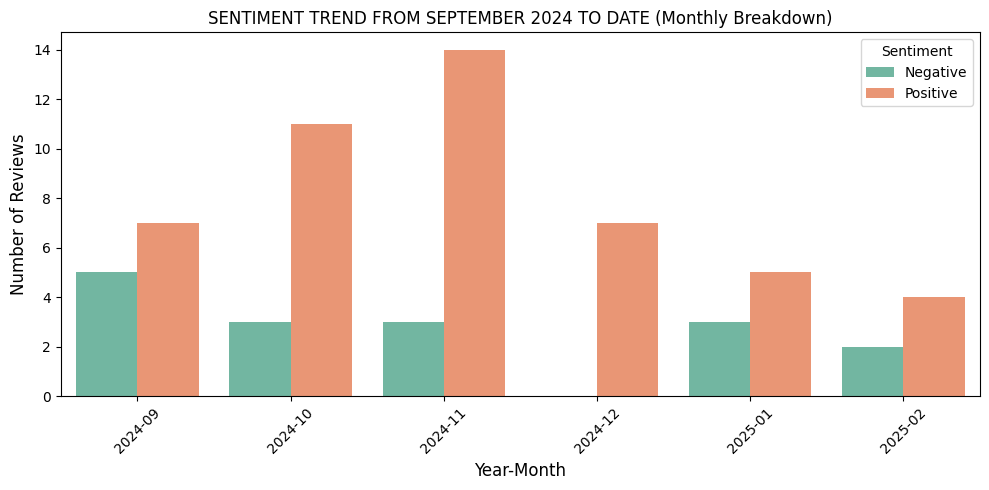

In [31]:
# Let's get a clearer view of our most recent reviews.
# Let's scope it down to the past 6 months. That is from September 2024 to date.
date_filtered = data[data["Dates"] >= "2024-09-01"]
date_filtered["Year_Month"] = date_filtered["Dates"].dt.to_period("M").astype(str)
monthly_sentiment = date_filtered.groupby(["Year_Month", "Sentiment"]).size().reset_index(name="Count")


plt.figure(figsize=(10, 5))
sns.barplot(x="Year_Month", y="Count", hue="Sentiment", data=monthly_sentiment, palette="Set2")

plt.title("SENTIMENT TREND FROM SEPTEMBER 2024 TO DATE (Monthly Breakdown)")
plt.xlabel("Year-Month", fontsize=12)
plt.ylabel("Number of Reviews", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Sentiment", loc="upper right")
plt.tight_layout()
plt.show()

### **Quantitative Sentiment Distribution**
Sorry I forgot this.

A general outlook on the number of sentiments.

This gives us a quantitative outlook on the sentiment distribution.

In [32]:
print("Negative: ", sum(data["Sentiment"].str.contains("Negative", na=False)))
print("Positive: ", sum(data["Sentiment"].str.contains("Positive", na=False)))
print("Neutral: ", sum(data["Sentiment"].str.contains("Neutral", na=False)))

Negative:  1051
Positive:  2827
Neutral:  39
